In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ff_data_list = []

for year in range(2002, 2019):
    ff_data = pd.read_csv('FF offense '+str(year)+'.csv')
    ff_data['YEAR'] = year
    
    # Remove injury designation from NAME column.
    for N in ff_data.NAME:
        if N[-2:] == ' P' or N[-2:] == ' O' or N[-2:] == ' Q' or N[-2:] == ' D':
            ff_data.NAME = ff_data.NAME.replace(N, N[:-2])
        if N[-3:] == ' IR':
            ff_data.NAME = ff_data.NAME.replace(N, N[:-3])
        if N[-4:] == ' SUS':
            ff_data.NAME = ff_data.NAME.replace(N, N[:-4])
            
    # Correct innaccurate position labels in POS column    
    no_qb = ff_data[ff_data.POS != 'QB']
    no_qb = no_qb[no_qb['PASS YDS'] > 106]
    index_ = no_qb.index.values
    
    for p in no_qb.POS:
        no_qb.POS = no_qb.POS.replace(p, 'QB')
        
    for i in index_:
        ff_data.loc[i] = no_qb.loc[i]
         
    ff_data_list.append(ff_data)

ff_data_list.reverse()
ALL = pd.concat(ff_data_list)
ALL = ALL.reset_index(drop=True)
ALL = ALL[ALL.POS != 'FB']
ALL = ALL[['YEAR', 'RANK', 'NAME', 'TEAM', 'POS', 'PTS']]

In [3]:
projections_2019 = pd.read_csv('2019 FF projections.csv')
projections_2019[:20]

,DRAFT RANK,NAME,TEAM,POS
0,1,Saquon Barkley,NYG,RB
1,2,Alvin Kamara,NO,RB
2,3,Christian McCaffrey,CAR,RB
3,4,Ezekiel Elliott,DAL,RB
4,5,David Johnson,ARI,RB
5,6,Nick Chubb,CLE,RB
6,7,James Conner,PIT,RB
7,8,DeAndre Hopkins,HOU,WR
8,9,Dalvin Cook,MIN,RB
9,10,Davante Adams,GB,WR


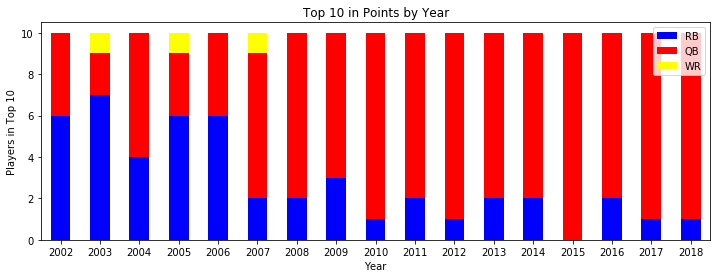

In [4]:
TOP10 = []

for year in range(2002, 2019):
    df = ALL[ALL.YEAR == year]
    TOP10.append(df.head(10).POS.value_counts())

df = pd.DataFrame(TOP10).fillna(0)
df.index = range(2002, 2019)

df.plot(kind='bar', color=['blue', 'red', 'yellow'], figsize=(12,4), rot=0, stacked=True)
plt.xlabel('Year')
plt.ylabel('Players in Top 10')
plt.title('Top 10 in Points by Year')
plt.legend(loc='upper right')
plt.show()

In [5]:
projections_2019[projections_2019.POS == 'QB'].head()

,DRAFT RANK,NAME,TEAM,POS
33,34,Patrick Mahomes,KC,QB
47,48,Deshaun Watson,HOU,QB
59,60,Aaron Rodgers,GB,QB
63,64,Baker Mayfield,CLE,QB
72,73,Carson Wentz,PHI,QB


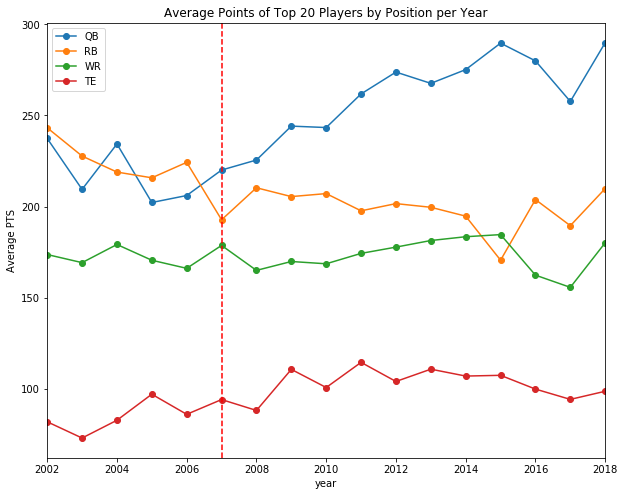

In [6]:
top20_means = []

for year in range(2002, 2019):
    top20 = ALL[ALL.YEAR == year]
    top20_means.append([top20[top20.POS == 'QB'][:20].PTS.mean(), 
                        top20[top20.POS == 'RB'][:20].PTS.mean(), 
                        top20[top20.POS == 'WR'][:20].PTS.mean(), 
                        top20[top20.POS == 'TE'][:20].PTS.mean()])
    
top20 = pd.DataFrame(top20_means, columns=['QB', 'RB', 'WR', 'TE']) 
top20.index = range(2002, 2019)

top20.plot(figsize=(10,8), marker='o')
plt.xlabel('year')
plt.ylabel('Average PTS')
plt.title('Average Points of Top 20 Players by Position per Year')
plt.axvline(2007, color='r', linestyle='--')
plt.show()

In [7]:
starter = []
position = ['QB', 'RB', 'WR', 'TE']

for year in range(2002, 2019):
    df = ALL[ALL.YEAR == year]
    for pos in position:
        if pos == 'QB' or pos == 'TE':
            starter.append(df[df.POS == pos][:12])
        else:
            starter.append(df[df.POS == pos][:24])
    
TOP = pd.concat(starter)
TOP = TOP.reset_index(drop=True)

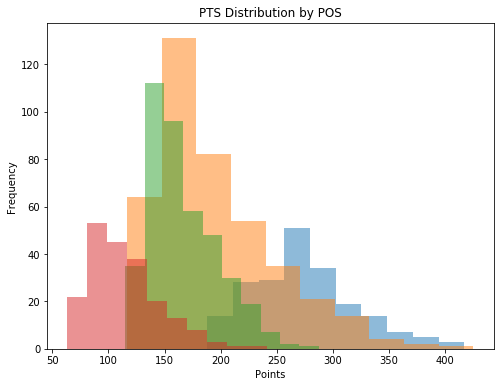

In [8]:
plt.figure(figsize=(8,6))
plt.hist(TOP[TOP.POS == 'QB'].PTS, alpha=.5)
plt.hist(TOP[TOP.POS == 'RB'].PTS, alpha=.5)
plt.hist(TOP[TOP.POS == 'WR'].PTS, alpha=.5)
plt.hist(TOP[TOP.POS == 'TE'].PTS, alpha=.5)
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.title('PTS Distribution by POS')
plt.show()

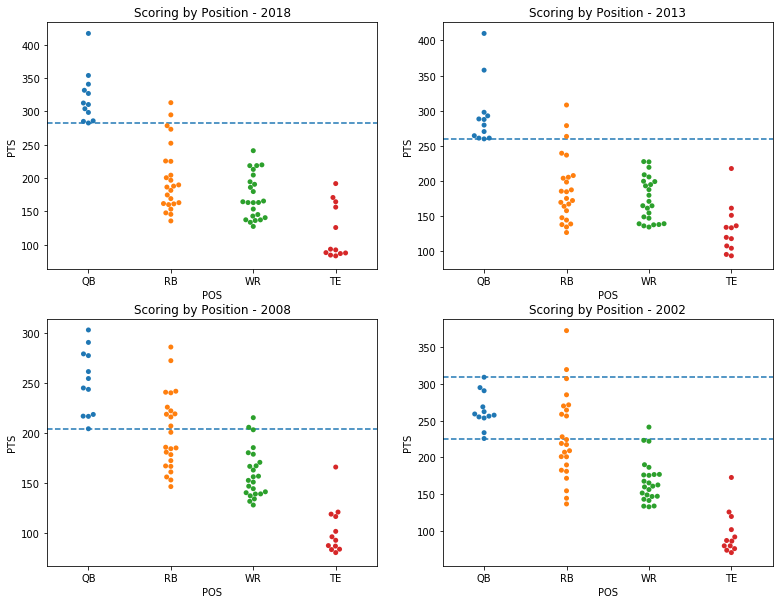

In [9]:
df18 = TOP[TOP.YEAR == 2018]
df13 = TOP[TOP.YEAR == 2013]
df08 = TOP[TOP.YEAR == 2008]
df02 = TOP[TOP.YEAR == 2002] 

plt.figure(figsize=(13,10))
plt.subplot(221)
sns.swarmplot(x='POS', y='PTS', data=df18)
plt.axhline(df18[df18.POS == 'QB'].PTS.min(), linestyle='--')
plt.title('Scoring by Position - 2018')

plt.subplot(222)
sns.swarmplot(x='POS', y='PTS', data=df13)
plt.axhline(df13[df13.POS == 'QB'].PTS.min(), linestyle='--')
plt.title('Scoring by Position - 2013')

plt.subplot(223)
sns.swarmplot(x='POS', y='PTS', data=df08)
plt.axhline(df08[df08.POS == 'QB'].PTS.min(), linestyle='--')
plt.title('Scoring by Position - 2008')

plt.subplot(224)
sns.swarmplot(x='POS', y='PTS', data=df02)
plt.axhline(df02[df02.POS == 'QB'].PTS.min(), linestyle='--')
plt.axhline(df02[df02.POS == 'QB'].PTS.max(), linestyle='--')
plt.title('Scoring by Position - 2002')
plt.show()

In [10]:
QB_STD5 = []
RB_STD5 = []
WR_STD5 = []
TE_STD5 = []

for year in range(2002, 2019):
    df = ALL[ALL.YEAR == year]
    QB = df[df.POS == 'QB']
    x = 0
    for i in range(int(len(QB)/5)):
        QB_STD5.append(QB['PTS'][x:x+5].std())
        x=x+5
        
    RB = df[df.POS == 'RB']
    x = 0
    for i in range(int(len(RB)/5)):
        RB_STD5.append(RB['PTS'][x:x+5].std())
        x=x+5
        
    WR = df[df.POS == 'WR']
    x = 0
    for i in range(int(len(WR)/5)):
        WR_STD5.append(WR['PTS'][x:x+5].std())
        x=x+5

    TE = df[df.POS == 'TE']
    x = 0
    for i in range(int(len(TE)/5)):
        TE_STD5.append(TE['PTS'][x:x+5].std())
        x=x+5

In [11]:
QB_AVG5 = []
RB_AVG5 = []
WR_AVG5 = []
TE_AVG5 = []

for year in range(2002, 2019):
    df = ALL[ALL.YEAR == year]
    QB = df[df.POS == 'QB']
    x = 0
    for i in range(int(len(QB)/5)):
        QB_AVG5.append(QB['PTS'][x:x+5].mean())
        x=x+5
        
    RB = df[df.POS == 'RB']
    x = 0
    for i in range(int(len(RB)/5)):
        RB_AVG5.append(RB['PTS'][x:x+5].mean())
        x=x+5
        
    WR = df[df.POS == 'WR']
    x = 0
    for i in range(int(len(WR)/5)):
        WR_AVG5.append(WR['PTS'][x:x+5].mean())
        x=x+5

    TE = df[df.POS == 'TE']
    x = 0
    for i in range(int(len(TE)/5)):
        TE_AVG5.append(TE['PTS'][x:x+5].mean())
        x=x+5

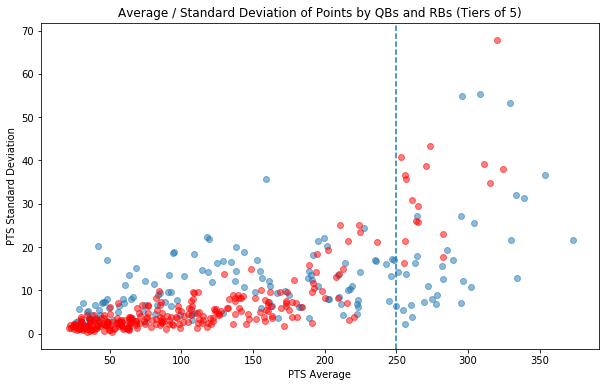

In [12]:
data = {'PTS AVG' : QB_AVG5, 'PTS STD': QB_STD5}
QB = pd.DataFrame(data)
        
data = {'PTS AVG' : RB_AVG5, 'PTS STD': RB_STD5}
RB = pd.DataFrame(data)

plt.figure(figsize=(10,6))
plt.scatter(QB['PTS AVG'], QB['PTS STD'], alpha=.5)
plt.scatter(RB['PTS AVG'], RB['PTS STD'], alpha=.5, color='red')
plt.xlabel('PTS Average')
plt.ylabel('PTS Standard Deviation')
plt.axvline(250, linestyle='--')
plt.title('Average / Standard Deviation of Points by QBs and RBs (Tiers of 5)')
plt.show()

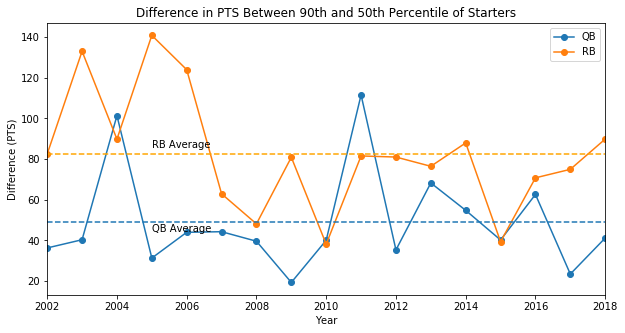

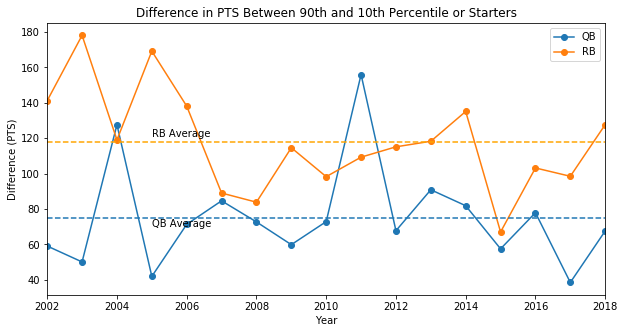

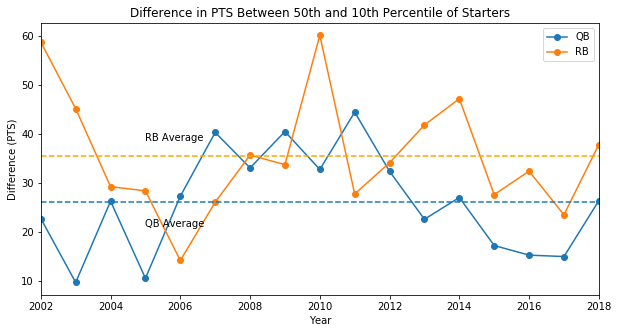

In [13]:
percentiles = [90, 50, 10]
top_perc = []

for year in range(2002, 2019):
    df1 = TOP[TOP.YEAR == year]
    qb_percentiles = []
    rb_percentiles = []
    wr_percentiles = []
    te_percentiles = []
    for p in percentiles:
        qb_percentiles.append(np.percentile(df1[df1.POS == 'QB'].PTS, p))
        rb_percentiles.append(np.percentile(df1[df1.POS == 'RB'].PTS, p))
        wr_percentiles.append(np.percentile(df1[df1.POS == 'WR'].PTS, p))
        te_percentiles.append(np.percentile(df1[df1.POS == 'TE'].PTS, p))
    data = {'PTS Percentile': percentiles, 
            'QB' : qb_percentiles, 
            'RB': rb_percentiles, 
            'WR': wr_percentiles, 
            'TE': te_percentiles}
    df2 = pd.DataFrame(data)
    df2['YEAR'] = year
    top_perc.append(df2)

pts_percentiles = pd.concat(top_perc)

QB_diff = []
RB_diff = []
QB_diff2 = []
RB_diff2 = []
QB_diff3 = []
RB_diff3 = []

for year in range(2002, 2019):
    df = pts_percentiles[pts_percentiles.YEAR == year]
    QB_diff.append(df.QB.loc[0] - df.QB.loc[1])
    RB_diff.append(df.RB.loc[0] - df.RB.loc[1])
    QB_diff2.append(df.QB.loc[0] - df.QB.loc[2])
    RB_diff2.append(df.RB.loc[0] - df.RB.loc[2]) 
    QB_diff3.append(df.QB.loc[1] - df.QB.loc[2])
    RB_diff3.append(df.RB.loc[1] - df.RB.loc[2]) 
    
data = {'QB': QB_diff, 'RB': RB_diff}
pctl_diff = pd.DataFrame(data)
pctl_diff.index = range(2002, 2019)

data2 = {'QB': QB_diff2, 'RB': RB_diff2}
pctl_diff2 = pd.DataFrame(data2)
pctl_diff2.index = range(2002, 2019)

data3 = {'QB': QB_diff3, 'RB': RB_diff3}
pctl_diff3 = pd.DataFrame(data3)
pctl_diff3.index = range(2002, 2019)

pctl_diff.plot(figsize=(10,5), marker='o')
plt.xlabel('Year')
plt.ylabel('Difference (PTS)')
plt.title('Difference in PTS Between 90th and 50th Percentile of Starters')
plt.axhline(np.mean(QB_diff), linestyle='--')
plt.text(2005, np.mean(QB_diff)-5, 'QB Average')
plt.axhline(np.mean(RB_diff), color='orange', linestyle='--')
plt.text(2005, np.mean(RB_diff)+3, 'RB Average')

pctl_diff2.plot(figsize=(10,5), marker='o')
plt.xlabel('Year')
plt.ylabel('Difference (PTS)')
plt.title('Difference in PTS Between 90th and 10th Percentile or Starters')
plt.axhline(np.mean(QB_diff2), linestyle='--')
plt.text(2005, np.mean(QB_diff2)-5, 'QB Average')
plt.axhline(np.mean(RB_diff2), color='orange', linestyle='--')
plt.text(2005, np.mean(RB_diff2)+3, 'RB Average')

pctl_diff3.plot(figsize=(10,5), marker='o')
plt.xlabel('Year')
plt.ylabel('Difference (PTS)')
plt.title('Difference in PTS Between 50th and 10th Percentile of Starters')
plt.axhline(np.mean(QB_diff3), linestyle='--')
plt.text(2005, np.mean(QB_diff3)-5, 'QB Average')
plt.axhline(np.mean(RB_diff3), color='orange', linestyle='--')
plt.text(2005, np.mean(RB_diff3)+3, 'RB Average')
plt.show()

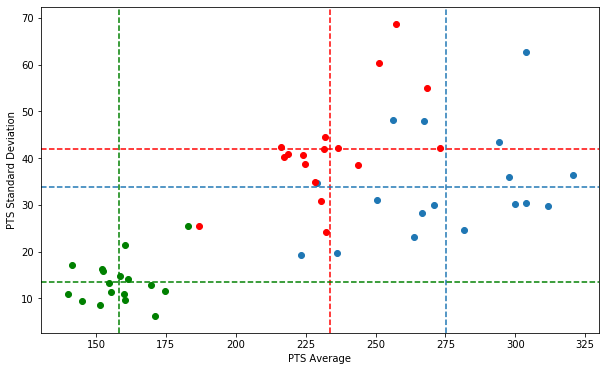

In [15]:
QB_mean = []
RB_mean = []
RB2_mean = []
QB_std = []
RB_std = []
RB2_std = []

for year in range(2002, 2019):
    df = TOP[TOP.YEAR == year]
    QB_mean.append(np.mean(df[df.POS == 'QB'].PTS))
    QB_std.append(np.std(df[df.POS == 'QB'].PTS))
    RB_mean.append(np.mean(df[df.POS == 'RB'][:12].PTS))
    RB_std.append(np.std(df[df.POS == 'RB'][:12].PTS))
    RB2_mean.append(np.mean(df[df.POS == 'RB'][12:].PTS))
    RB2_std.append(np.std(df[df.POS == 'RB'][12:].PTS))
    
plt.figure(figsize=(10,6))
plt.scatter(QB_mean, QB_std)
plt.scatter(RB_mean, RB_std, color='red')
plt.scatter(RB2_mean, RB2_std, color='green')
plt.xlabel('PTS Average')
plt.ylabel('PTS Standard Deviation')
plt.axvline(np.mean(QB_mean), linestyle='--')
plt.axvline(np.mean(RB_mean), linestyle='--', color='red')
plt.axvline(np.mean(RB2_mean), linestyle='--', color='green')
plt.axhline(np.mean(QB_std), linestyle='--')
plt.axhline(np.mean(RB_std), linestyle='--', color='red')
plt.axhline(np.mean(RB2_std), linestyle='--', color='green')
plt.show()

In [16]:
# Draft simulation based purely on final scoring.

df_year = ALL[ALL.YEAR == 2018]

team1 = []
team1_pos = []
team2 = []
team2_pos = []
team3 = []
team3_pos = []
team4 = []
team4_pos = []
team5 = []
team5_pos = []
team6 = []
team6_pos = []
team7 = []
team7_pos = []
team8 = []
team8_pos = []
team9 = []
team9_pos = []
team10 = []
team10_pos = []
team11 = []
team11_pos = []
team12 = []
team12_pos = []

teams = [(team1, team1_pos),
         (team2, team2_pos),
         (team3, team3_pos),
         (team4, team4_pos),
         (team5, team5_pos),
         (team6, team6_pos),
         (team7, team7_pos),
         (team8, team8_pos),
         (team9, team9_pos),
         (team10, team10_pos),
         (team11, team11_pos),
         (team12, team12_pos)]

for i in range(72):
    for team in teams:
        if team[1].count('QB') < 1 and team[1].count('RB') < 2 and team[1].count('WR') < 2 and team[1].count('TE') < 1:
            team[0].append(df_year.loc[df_year.index.min()])
            team[1].append(df_year.loc[df_year.index.min()].POS)
            df_year = df_year.drop(df_year.index.min())
            continue
        if team[1].count('QB') == 1 and team[1].count('RB') < 2 and team[1].count('WR') < 2 and team[1].count('TE') < 1:
            df = df_year[df_year.POS != 'QB']
            team[0].append(df_year.loc[df.index.min()])
            team[1].append(df_year.loc[df.index.min()].POS)
            df_year = df_year.drop(df.index.min())
            continue
        if team[1].count('QB') < 1 and team[1].count('RB') == 2 and team[1].count('WR') < 2 and team[1].count('TE') < 1:
            df = df_year[df_year.POS != 'RB']
            team[0].append(df_year.loc[df.index.min()])
            team[1].append(df_year.loc[df.index.min()].POS)
            df_year = df_year.drop(df.index.min())
            continue
        if team[1].count('QB') < 1 and team[1].count('RB') < 2 and team[1].count('WR') == 2 and team[1].count('TE') < 1:
            df = df_year[df_year.POS != 'WR']
            team[0].append(df_year.loc[df.index.min()])
            team[1].append(df_year.loc[df.index.min()].POS)
            df_year = df_year.drop(df.index.min())
            continue
        if team[1].count('QB') < 1 and team[1].count('RB') < 2 and team[1].count('WR') < 2 and team[1].count('TE') == 1:
            df = df_year[df_year.POS != 'TE']
            team[0].append(df_year.loc[df.index.min()])
            team[1].append(df_year.loc[df.index.min()].POS)
            df_year = df_year.drop(df.index.min())
            continue
        if team[1].count('QB') < 1 and team[1].count('RB') == 2 and team[1].count('WR') == 2 and team[1].count('TE') < 1:
            df = df_year[df_year.POS != 'RB']
            df = df[df.POS != 'WR']
            team[0].append(df_year.loc[df.index.min()])
            team[1].append(df_year.loc[df.index.min()].POS)
            df_year = df_year.drop(df.index.min())
            continue
        if team[1].count('QB') == 1 and team[1].count('RB') < 2 and team[1].count('WR') == 2 and team[1].count('TE') < 1:
            df = df_year[df_year.POS != 'QB']
            df = df[df.POS != 'WR']
            team[0].append(df_year.loc[df.index.min()])
            team[1].append(df_year.loc[df.index.min()].POS)
            df_year = df_year.drop(df.index.min())
            continue
        if team[1].count('QB') < 1 and team[1].count('RB') == 2 and team[1].count('WR') < 2 and team[1].count('TE') == 1:
            df = df_year[df_year.POS != 'TE']
            df = df[df.POS != 'RB']
            team[0].append(df_year.loc[df.index.min()])
            team[1].append(df_year.loc[df.index.min()].POS)
            df_year = df_year.drop(df.index.min())
            continue
        if team[1].count('QB') < 1 and team[1].count('RB') < 2 and team[1].count('WR') == 2 and team[1].count('TE') == 1:
            df = df_year[df_year.POS != 'TE']
            df = df[df.POS != 'WR']
            team[0].append(df_year.loc[df.index.min()])
            team[1].append(df_year.loc[df.index.min()].POS)
            df_year = df_year.drop(df.index.min())
            continue
        if team[1].count('QB') == 1 and team[1].count('RB') < 2 and team[1].count('WR') < 2 and team[1].count('TE') == 1:
            df = df_year[df_year.POS != 'QB']
            df = df[df.POS != 'TE']
            team[0].append(df_year.loc[df.index.min()])
            team[1].append(df_year.loc[df.index.min()].POS)
            df_year = df_year.drop(df.index.min())
            continue
        if team[1].count('QB') == 1 and team[1].count('RB') == 2 and team[1].count('WR') < 2 and team[1].count('TE') < 1:
            df = df_year[df_year.POS != 'QB']
            df = df[df.POS != 'RB']
            team[0].append(df_year.loc[df.index.min()])
            team[1].append(df_year.loc[df.index.min()].POS)
            df_year = df_year.drop(df.index.min())
            continue
        if team[1].count('QB') < 1 and team[1].count('RB') == 2 and team[1].count('WR') == 2 and team[1].count('TE') == 1:
            df = df_year[df_year.POS != 'WR']
            df = df[df.POS != 'RB']
            df = df[df.POS != 'TE']
            team[0].append(df_year.loc[df.index.min()])
            team[1].append(df_year.loc[df.index.min()].POS)
            df_year = df_year.drop(df.index.min())
            continue
        if team[1].count('QB') == 1 and team[1].count('RB') < 2 and team[1].count('WR') == 2 and team[1].count('TE') == 1:
            df = df_year[df_year.POS != 'WR']
            df = df[df.POS != 'QB']
            df = df[df.POS != 'TE']
            team[0].append(df_year.loc[df.index.min()])
            team[1].append(df_year.loc[df.index.min()].POS)
            df_year = df_year.drop(df.index.min())
            continue
        if team[1].count('QB') == 1 and team[1].count('RB') == 2 and team[1].count('WR') < 2 and team[1].count('TE') == 1:
            df = df_year[df_year.POS != 'RB']
            df = df[df.POS != 'QB']
            df = df[df.POS != 'TE']
            team[0].append(df_year.loc[df.index.min()])
            team[1].append(df_year.loc[df.index.min()].POS)
            df_year = df_year.drop(df.index.min())
            continue
        if team[1].count('QB') == 1 and team[1].count('RB') == 2 and team[1].count('WR') == 2 and team[1].count('TE') < 1:
            df = df_year[df_year.POS != 'RB']
            df = df[df.POS != 'QB']
            df = df[df.POS != 'WR']
            team[0].append(df_year.loc[df.index.min()])
            team[1].append(df_year.loc[df.index.min()].POS)
            df_year = df_year.drop(df.index.min())
            continue
    teams.reverse()
    
TEAM1 = pd.DataFrame(team1)
TEAM2 = pd.DataFrame(team2)
TEAM3 = pd.DataFrame(team3)
TEAM4 = pd.DataFrame(team4)
TEAM5 = pd.DataFrame(team5)
TEAM6 = pd.DataFrame(team6)
TEAM7 = pd.DataFrame(team7)
TEAM8 = pd.DataFrame(team8)
TEAM9 = pd.DataFrame(team9)
TEAM10 = pd.DataFrame(team10)
TEAM11 = pd.DataFrame(team11)
TEAM12 = pd.DataFrame(team12)

league = (TEAM1, TEAM2, TEAM3, TEAM4, TEAM5, TEAM6, TEAM7, TEAM8, TEAM9, TEAM10, TEAM11, TEAM12)
team_names = ['TEAM 1', 'TEAM 2', 'TEAM 3', 'TEAM 4', 'TEAM 5', 'TEAM 6', 
              'TEAM 7', 'TEAM 8', 'TEAM 9', 'TEAM 10', 'TEAM 11', 'TEAM 12']
pts_sums = []
QB_pts = []
RB_pts = []
WR_pts = []
TE_pts = []

for team in league:
    pts_sums.append(team.PTS.sum())
    QB_pts.append(team[team.POS == 'QB'].PTS.item())
    RB_pts.append(team[team.POS == 'RB'].PTS.sum())
    WR_pts.append(team[team.POS == 'WR'].PTS.sum())
    TE_pts.append(team[team.POS == 'TE'].PTS.item())
    
data = {'TEAM': team_names, 'TOTAL PTS': pts_sums, 'QB PTS': QB_pts, 
        'RB PTS': RB_pts, 'WR PTS': WR_pts, 'TE PTS': TE_pts}
league_stats = pd.DataFrame(data)
league_stats = league_stats.sort_values('TOTAL PTS', ascending=False)
league_stats['LEAGUE RNK'] = range(1,13)
league_stats = league_stats[['TEAM', 'LEAGUE RNK', 'TOTAL PTS', 'QB PTS', 'RB PTS', 'WR PTS', 'TE PTS']]
league_stats

,TEAM,LEAGUE RNK,TOTAL PTS,QB PTS,RB PTS,WR PTS,TE PTS
5,TEAM 6,1,1240.44,282.60,448.60,317.64,191.6
0,TEAM 1,2,1240.08,417.08,322.70,417.30,83.0
1,TEAM 2,3,1223.02,353.96,367.14,345.72,156.2
9,TEAM 10,4,1205.20,298.42,459.56,276.52,170.7
11,TEAM 12,5,1188.06,285.86,459.90,316.70,125.6
6,TEAM 7,6,1171.70,312.58,370.90,323.92,164.3
10,TEAM 11,7,1170.52,285.02,469.30,323.10,93.1
2,TEAM 3,8,1167.06,340.86,360.40,381.60,84.2
3,TEAM 4,9,1150.80,331.70,349.80,382.80,86.5
4,TEAM 5,10,1144.42,326.92,372.60,357.50,87.4


In [17]:
TEAM6

,YEAR,RANK,NAME,TEAM,POS,PTS
5,2018,6,Todd Gurley,LAR,RB,313.10
13,2018,14,Cam Newton,CAR,QB,282.60
40,2018,41,Travis Kelce,KC,TE,191.60
58,2018,58,Stefon Diggs,MIN,WR,164.30
68,2018,69,Odell Beckham Jr,NYG,WR,153.34
81,2018,82,Matt Breida,SF,RB,135.50


In [76]:
# Draft simulation based purely on final scoring with randomness.

df_year = ALL[ALL.YEAR == 2018]
pick_range = 6

team1 = []
team1_pos = []
team2 = []
team2_pos = []
team3 = []
team3_pos = []
team4 = []
team4_pos = []
team5 = []
team5_pos = []
team6 = []
team6_pos = []
team7 = []
team7_pos = []
team8 = []
team8_pos = []
team9 = []
team9_pos = []
team10 = []
team10_pos = []
team11 = []
team11_pos = []
team12 = []
team12_pos = []

teams = [(team1, team1_pos),
         (team2, team2_pos),
         (team3, team3_pos),
         (team4, team4_pos),
         (team5, team5_pos),
         (team6, team6_pos),
         (team7, team7_pos),
         (team8, team8_pos),
         (team9, team9_pos),
         (team10, team10_pos),
         (team11, team11_pos),
         (team12, team12_pos)]

for i in range(72):
    for team in teams:
        if team[1].count('QB') < 1 and team[1].count('RB') < 2 and team[1].count('WR') < 2 and team[1].count('TE') < 1:
            pick = df_year[:pick_range].sample().index.item()
            team[0].append(df_year.loc[pick])
            team[1].append(df_year.loc[pick].POS)
            df_year = df_year.drop(pick)
            continue
        if team[1].count('QB') == 1 and team[1].count('RB') < 2 and team[1].count('WR') < 2 and team[1].count('TE') < 1:
            df = df_year[df_year.POS != 'QB']
            pick = df[:pick_range].sample().index.item()
            team[0].append(df_year.loc[pick])
            team[1].append(df_year.loc[pick].POS)
            df_year = df_year.drop(pick)
            continue
        if team[1].count('QB') < 1 and team[1].count('RB') == 2 and team[1].count('WR') < 2 and team[1].count('TE') < 1:
            df = df_year[df_year.POS != 'RB']
            pick = df[:pick_range].sample().index.item()
            team[0].append(df_year.loc[pick])
            team[1].append(df_year.loc[pick].POS)
            df_year = df_year.drop(pick)
            continue
        if team[1].count('QB') < 1 and team[1].count('RB') < 2 and team[1].count('WR') == 2 and team[1].count('TE') < 1:
            df = df_year[df_year.POS != 'WR']
            pick = df[:pick_range].sample().index.item()
            team[0].append(df_year.loc[pick])
            team[1].append(df_year.loc[pick].POS)
            df_year = df_year.drop(pick)
            continue
        if team[1].count('QB') < 1 and team[1].count('RB') < 2 and team[1].count('WR') < 2 and team[1].count('TE') == 1:
            df = df_year[df_year.POS != 'TE']
            pick = df[:pick_range].sample().index.item()
            team[0].append(df_year.loc[pick])
            team[1].append(df_year.loc[pick].POS)
            df_year = df_year.drop(pick)
            continue
        if team[1].count('QB') < 1 and team[1].count('RB') == 2 and team[1].count('WR') == 2 and team[1].count('TE') < 1:
            df = df_year[df_year.POS != 'RB']
            df = df[df.POS != 'WR']
            pick = df[:pick_range].sample().index.item()
            team[0].append(df_year.loc[pick])
            team[1].append(df_year.loc[pick].POS)
            df_year = df_year.drop(pick)
            continue
        if team[1].count('QB') == 1 and team[1].count('RB') < 2 and team[1].count('WR') == 2 and team[1].count('TE') < 1:
            df = df_year[df_year.POS != 'QB']
            df = df[df.POS != 'WR']
            pick = df[:pick_range].sample().index.item()
            team[0].append(df_year.loc[pick])
            team[1].append(df_year.loc[pick].POS)
            df_year = df_year.drop(pick)
            continue
        if team[1].count('QB') < 1 and team[1].count('RB') == 2 and team[1].count('WR') < 2 and team[1].count('TE') == 1:
            df = df_year[df_year.POS != 'TE']
            df = df[df.POS != 'RB']
            pick = df[:pick_range].sample().index.item()
            team[0].append(df_year.loc[pick])
            team[1].append(df_year.loc[pick].POS)
            df_year = df_year.drop(pick)
            continue
        if team[1].count('QB') < 1 and team[1].count('RB') < 2 and team[1].count('WR') == 2 and team[1].count('TE') == 1:
            df = df_year[df_year.POS != 'TE']
            df = df[df.POS != 'WR']
            pick = df[:pick_range].sample().index.item()
            team[0].append(df_year.loc[pick])
            team[1].append(df_year.loc[pick].POS)
            df_year = df_year.drop(pick)
            continue
        if team[1].count('QB') == 1 and team[1].count('RB') < 2 and team[1].count('WR') < 2 and team[1].count('TE') == 1:
            df = df_year[df_year.POS != 'QB']
            df = df[df.POS != 'TE']
            pick = df[:pick_range].sample().index.item()
            team[0].append(df_year.loc[pick])
            team[1].append(df_year.loc[pick].POS)
            df_year = df_year.drop(pick)
            continue
        if team[1].count('QB') == 1 and team[1].count('RB') == 2 and team[1].count('WR') < 2 and team[1].count('TE') < 1:
            df = df_year[df_year.POS != 'QB']
            df = df[df.POS != 'RB']
            pick = df[:pick_range].sample().index.item()
            team[0].append(df_year.loc[pick])
            team[1].append(df_year.loc[pick].POS)
            df_year = df_year.drop(pick)
            continue
        if team[1].count('QB') < 1 and team[1].count('RB') == 2 and team[1].count('WR') == 2 and team[1].count('TE') == 1:
            df = df_year[df_year.POS != 'WR']
            df = df[df.POS != 'RB']
            df = df[df.POS != 'TE']
            pick = df[:pick_range].sample().index.item()
            team[0].append(df_year.loc[pick])
            team[1].append(df_year.loc[pick].POS)
            df_year = df_year.drop(pick)
            continue
        if team[1].count('QB') == 1 and team[1].count('RB') < 2 and team[1].count('WR') == 2 and team[1].count('TE') == 1:
            df = df_year[df_year.POS != 'WR']
            df = df[df.POS != 'QB']
            df = df[df.POS != 'TE']
            pick = df[:pick_range].sample().index.item()
            team[0].append(df_year.loc[pick])
            team[1].append(df_year.loc[pick].POS)
            df_year = df_year.drop(pick)
            continue
        if team[1].count('QB') == 1 and team[1].count('RB') == 2 and team[1].count('WR') < 2 and team[1].count('TE') == 1:
            df = df_year[df_year.POS != 'RB']
            df = df[df.POS != 'QB']
            df = df[df.POS != 'TE']
            pick = df[:pick_range].sample().index.item()
            team[0].append(df_year.loc[pick])
            team[1].append(df_year.loc[pick].POS)
            df_year = df_year.drop(pick)
            continue
        if team[1].count('QB') == 1 and team[1].count('RB') == 2 and team[1].count('WR') == 2 and team[1].count('TE') < 1:
            df = df_year[df_year.POS != 'RB']
            df = df[df.POS != 'QB']
            df = df[df.POS != 'WR']
            pick = df[:pick_range].sample().index.item()
            team[0].append(df_year.loc[pick])
            team[1].append(df_year.loc[pick].POS)
            df_year = df_year.drop(pick)
            continue
    teams.reverse()
    
TEAM1_2 = pd.DataFrame(team1)
TEAM2_2 = pd.DataFrame(team2)
TEAM3_2 = pd.DataFrame(team3)
TEAM4_2 = pd.DataFrame(team4)
TEAM5_2 = pd.DataFrame(team5)
TEAM6_2 = pd.DataFrame(team6)
TEAM7_2 = pd.DataFrame(team7)
TEAM8_2 = pd.DataFrame(team8)
TEAM9_2 = pd.DataFrame(team9)
TEAM10_2 = pd.DataFrame(team10)
TEAM11_2 = pd.DataFrame(team11)
TEAM12_2 = pd.DataFrame(team12)

league2 = (TEAM1_2, TEAM2_2, TEAM3_2, TEAM4_2, TEAM5_2, TEAM6_2, TEAM7_2, TEAM8_2, TEAM9_2, TEAM10_2, TEAM11_2, TEAM12_2)
team_names = ['TEAM 1', 'TEAM 2', 'TEAM 3', 'TEAM 4', 'TEAM 5', 'TEAM 6', 
              'TEAM 7', 'TEAM 8', 'TEAM 9', 'TEAM 10', 'TEAM 11', 'TEAM 12']
pts_sums = []
QB_pts = []
RB_pts = []
WR_pts = []
TE_pts = []
most_points = 0

for team in league2:
    pts_sums.append(team.PTS.sum())
    QB_pts.append(team[team.POS == 'QB'].PTS.item())
    RB_pts.append(team[team.POS == 'RB'].PTS.sum())
    WR_pts.append(team[team.POS == 'WR'].PTS.sum())
    TE_pts.append(team[team.POS == 'TE'].PTS.item())
    
data = {'TEAM': team_names, 'TOTAL PTS': pts_sums, 'QB PTS': QB_pts, 
        'RB PTS': RB_pts, 'WR PTS': WR_pts, 'TE PTS': TE_pts}
league2_stats = pd.DataFrame(data)
league2_stats = league2_stats.sort_values('TOTAL PTS', ascending=False)
league2_stats['LEAGUE RNK'] = range(1,13)
league2_stats = league2_stats[['TEAM', 'LEAGUE RNK', 'TOTAL PTS', 'QB PTS', 'RB PTS', 'WR PTS', 'TE PTS']]
league2_stats

,TEAM,LEAGUE RNK,TOTAL PTS,QB PTS,RB PTS,WR PTS,TE PTS
5,TEAM 6,1,1308.48,417.08,495.20,308.30,87.9
7,TEAM 8,2,1241.14,331.70,454.60,290.54,164.3
11,TEAM 12,3,1222.06,280.30,464.86,306.20,170.7
1,TEAM 2,4,1212.20,353.96,387.94,378.30,92.0
2,TEAM 3,5,1166.74,310.32,429.70,270.52,156.2
9,TEAM 10,6,1145.42,326.92,441.80,289.30,87.4
0,TEAM 1,7,1141.66,340.86,322.20,412.80,65.8
4,TEAM 5,8,1140.12,263.02,509.70,283.20,84.2
10,TEAM 11,9,1134.92,282.12,306.60,420.60,125.6
6,TEAM 7,10,1124.86,285.86,265.80,381.60,191.6


In [77]:
TEAM6_2

,YEAR,RANK,NAME,TEAM,POS,PTS
0,2018,1,Patrick Mahomes,KC,QB,417.08
10,2018,11,Saquon Barkley,NYG,RB,294.80
35,2018,36,Joe Mixon,CIN,RB,200.40
59,2018,60,Brandin Cooks,LAR,WR,163.20
72,2018,73,Tyler Boyd,CIN,WR,145.10
136,2018,137,David Njoku,CLE,TE,87.90


In [173]:
# Draft simulation based purely on final scoring with randomness.

pick_range = 9
winners = []
leagues = []

for draft in range(0,1000):
    df_year = ALL[ALL.YEAR == 2018]
    
    team1 = []
    team1_pos = []
    team2 = []
    team2_pos = []
    team3 = []
    team3_pos = []
    team4 = []
    team4_pos = []
    team5 = []
    team5_pos = []
    team6 = []
    team6_pos = []
    team7 = []
    team7_pos = []
    team8 = []
    team8_pos = []
    team9 = []
    team9_pos = []
    team10 = []
    team10_pos = []
    team11 = []
    team11_pos = []
    team12 = []
    team12_pos = []

    teams = [(team1, team1_pos),
             (team2, team2_pos),
             (team3, team3_pos),
             (team4, team4_pos),
             (team5, team5_pos),
             (team6, team6_pos),
             (team7, team7_pos),
             (team8, team8_pos),
             (team9, team9_pos),
             (team10, team10_pos),
             (team11, team11_pos),
             (team12, team12_pos)]

    for i in range(72):
        for team in teams:
            if team[1].count('QB') < 1 and team[1].count('RB') < 2 and team[1].count('WR') < 2 and team[1].count('TE') < 1:
                pick = df_year[:pick_range].sample().index.item()
                team[0].append(df_year.loc[pick])
                team[1].append(df_year.loc[pick].POS)
                df_year = df_year.drop(pick)
                continue
            if team[1].count('QB') == 1 and team[1].count('RB') < 2 and team[1].count('WR') < 2 and team[1].count('TE') < 1:
                df = df_year[df_year.POS != 'QB']
                pick = df[:pick_range].sample().index.item()
                team[0].append(df_year.loc[pick])
                team[1].append(df_year.loc[pick].POS)
                df_year = df_year.drop(pick)
                continue
            if team[1].count('QB') < 1 and team[1].count('RB') == 2 and team[1].count('WR') < 2 and team[1].count('TE') < 1:
                df = df_year[df_year.POS != 'RB']
                pick = df[:pick_range].sample().index.item()
                team[0].append(df_year.loc[pick])
                team[1].append(df_year.loc[pick].POS)
                df_year = df_year.drop(pick)
                continue
            if team[1].count('QB') < 1 and team[1].count('RB') < 2 and team[1].count('WR') == 2 and team[1].count('TE') < 1:
                df = df_year[df_year.POS != 'WR']
                pick = df[:pick_range].sample().index.item()
                team[0].append(df_year.loc[pick])
                team[1].append(df_year.loc[pick].POS)
                df_year = df_year.drop(pick)
                continue
            if team[1].count('QB') < 1 and team[1].count('RB') < 2 and team[1].count('WR') < 2 and team[1].count('TE') == 1:
                df = df_year[df_year.POS != 'TE']
                pick = df[:pick_range].sample().index.item()
                team[0].append(df_year.loc[pick])
                team[1].append(df_year.loc[pick].POS)
                df_year = df_year.drop(pick)
                continue
            if team[1].count('QB') < 1 and team[1].count('RB') == 2 and team[1].count('WR') == 2 and team[1].count('TE') < 1:
                df = df_year[df_year.POS != 'RB']
                df = df[df.POS != 'WR']
                pick = df[:pick_range].sample().index.item()
                team[0].append(df_year.loc[pick])
                team[1].append(df_year.loc[pick].POS)
                df_year = df_year.drop(pick)
                continue
            if team[1].count('QB') == 1 and team[1].count('RB') < 2 and team[1].count('WR') == 2 and team[1].count('TE') < 1:
                df = df_year[df_year.POS != 'QB']
                df = df[df.POS != 'WR']
                pick = df[:pick_range].sample().index.item()
                team[0].append(df_year.loc[pick])
                team[1].append(df_year.loc[pick].POS)
                df_year = df_year.drop(pick)
                continue
            if team[1].count('QB') < 1 and team[1].count('RB') == 2 and team[1].count('WR') < 2 and team[1].count('TE') == 1:
                df = df_year[df_year.POS != 'TE']
                df = df[df.POS != 'RB']
                pick = df[:pick_range].sample().index.item()
                team[0].append(df_year.loc[pick])
                team[1].append(df_year.loc[pick].POS)
                df_year = df_year.drop(pick)
                continue
            if team[1].count('QB') < 1 and team[1].count('RB') < 2 and team[1].count('WR') == 2 and team[1].count('TE') == 1:
                df = df_year[df_year.POS != 'TE']
                df = df[df.POS != 'WR']
                pick = df[:pick_range].sample().index.item()
                team[0].append(df_year.loc[pick])
                team[1].append(df_year.loc[pick].POS)
                df_year = df_year.drop(pick)
                continue
            if team[1].count('QB') == 1 and team[1].count('RB') < 2 and team[1].count('WR') < 2 and team[1].count('TE') == 1:
                df = df_year[df_year.POS != 'QB']
                df = df[df.POS != 'TE']
                pick = df[:pick_range].sample().index.item()
                team[0].append(df_year.loc[pick])
                team[1].append(df_year.loc[pick].POS)
                df_year = df_year.drop(pick)
                continue
            if team[1].count('QB') == 1 and team[1].count('RB') == 2 and team[1].count('WR') < 2 and team[1].count('TE') < 1:
                df = df_year[df_year.POS != 'QB']
                df = df[df.POS != 'RB']
                pick = df[:pick_range].sample().index.item()
                team[0].append(df_year.loc[pick])
                team[1].append(df_year.loc[pick].POS)
                df_year = df_year.drop(pick)
                continue
            if team[1].count('QB') < 1 and team[1].count('RB') == 2 and team[1].count('WR') == 2 and team[1].count('TE') == 1:
                df = df_year[df_year.POS != 'WR']
                df = df[df.POS != 'RB']
                df = df[df.POS != 'TE']
                pick = df[:pick_range].sample().index.item()
                team[0].append(df_year.loc[pick])
                team[1].append(df_year.loc[pick].POS)
                df_year = df_year.drop(pick)
                continue
            if team[1].count('QB') == 1 and team[1].count('RB') < 2 and team[1].count('WR') == 2 and team[1].count('TE') == 1:
                df = df_year[df_year.POS != 'WR']
                df = df[df.POS != 'QB']
                df = df[df.POS != 'TE']
                pick = df[:pick_range].sample().index.item()
                team[0].append(df_year.loc[pick])
                team[1].append(df_year.loc[pick].POS)
                df_year = df_year.drop(pick)
                continue
            if team[1].count('QB') == 1 and team[1].count('RB') == 2 and team[1].count('WR') < 2 and team[1].count('TE') == 1:
                df = df_year[df_year.POS != 'RB']
                df = df[df.POS != 'QB']
                df = df[df.POS != 'TE']
                pick = df[:pick_range].sample().index.item()
                team[0].append(df_year.loc[pick])
                team[1].append(df_year.loc[pick].POS)
                df_year = df_year.drop(pick)
                continue
            if team[1].count('QB') == 1 and team[1].count('RB') == 2 and team[1].count('WR') == 2 and team[1].count('TE') < 1:
                df = df_year[df_year.POS != 'RB']
                df = df[df.POS != 'QB']
                df = df[df.POS != 'WR']
                pick = df[:pick_range].sample().index.item()
                team[0].append(df_year.loc[pick])
                team[1].append(df_year.loc[pick].POS)
                df_year = df_year.drop(pick)
                continue
        teams.reverse()

        
    TEAM1_2 = pd.DataFrame(team1)
    TEAM2_2 = pd.DataFrame(team2)
    TEAM3_2 = pd.DataFrame(team3)
    TEAM4_2 = pd.DataFrame(team4)
    TEAM5_2 = pd.DataFrame(team5)
    TEAM6_2 = pd.DataFrame(team6)
    TEAM7_2 = pd.DataFrame(team7)
    TEAM8_2 = pd.DataFrame(team8)
    TEAM9_2 = pd.DataFrame(team9)
    TEAM10_2 = pd.DataFrame(team10)
    TEAM11_2 = pd.DataFrame(team11)
    TEAM12_2 = pd.DataFrame(team12)
    
    league2 = (TEAM1_2, TEAM2_2, TEAM3_2, TEAM4_2, TEAM5_2, TEAM6_2, TEAM7_2, TEAM8_2, TEAM9_2, TEAM10_2, TEAM11_2, TEAM12_2)
    
    pts_sums = []
    most_points = 0

    for team in league2:
        pts_sums.append(team.PTS.sum())
        if team.PTS.sum() > most_points:
            most_points = team.PTS.sum()
            best_team = team
            
    winners.append(best_team)

In [174]:
# projections_2019 = pd.read_csv('2019 FF projections.csv')
# projections_2019.columns = ['DRAFT RANK', 'NAME', 'Pos', 'PosRank']
# ff2019 = ALL[ALL.YEAR== 2018]
# ff2019 = ff2019.drop(columns = ['RANK', 'YEAR'])    
# ff2019 = ff2019.merge(projections_2019).sort_values('DRAFT RANK')
# ff2019 = ff2019.drop(columns=['Pos', 'PosRank'])

In [180]:
D = pd.concat(winners)
means = D.groupby('POS').PTS.mean()
percent_of_means = means/means.sum()*100
sums = D.groupby('POS').PTS.sum()
percent_of_sums = sums/sums.sum()*100

# Average points by position, percents of average points by position, percents of total points by position.
means, percent_of_means, percent_of_sums

(POS
 QB    351.26612
 RB    228.72827
 TE    132.67640
 WR    169.95883
 Name: PTS, dtype: float64, POS
 QB    39.797681
 RB    25.914411
 TE    15.031945
 WR    19.255963
 Name: PTS, dtype: float64, POS
 QB    27.414465
 RB    35.702066
 TE    10.354692
 WR    26.528777
 Name: PTS, dtype: float64)

In [182]:
# highest occurences of players on highest scoreing teams (percents)
(D.NAME.value_counts()/10).head(10)

Patrick Mahomes        37.5
Todd Gurley            28.0
Saquon Barkley         18.6
Eric Ebron             17.9
Alvin Kamara           17.7
Christian McCaffrey    17.4
Ezekiel Elliott        13.0
Zach Ertz              12.6
Tyreek Hill            12.6
Travis Kelce           12.4
Name: NAME, dtype: float64